In [1]:
import pandas as pd
import os
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
# Parameter windowing
input_width = 48
label_width = 1
shift = label_width
total_window_size = input_width + shift
OUT_STEPS = label_width
# Definisikan irisan untuk input dan label
input_slice = slice(0, input_width)
label_start = total_window_size - label_width
labels_slice = slice(label_start, None)

from A_template import  scale_array, inverse_scale_array,  process_predictions, compute_metrics, compute_error, make_windows_autoregressive

In [2]:
data_training= pd.read_excel('D:\\KULIAH S2\\Komputasi Lanjut\\CODE\\ANN\\cuaca_bebanLR5_v2.xlsx', index_col=0)
data_training

,Beban,Hari_Khus,Jam_sin,Jam_cos,Hari_sin,Hari_cos,Hari_Khus_sin,Hari_Khus_cos,Tanggal_sin,Tanggal_cos,Bulan_sin,Bulan_cos
Date,,,,,,,,,,,,
2023-02-12 00:30:00,20312.00,0,0.130526,0.991445,-0.781831,0.62349,0.0,1.0,7.431448e-01,-0.669131,0.5,0.866025
2023-02-12 01:00:00,20180.00,0,0.258819,0.965926,-0.781831,0.62349,0.0,1.0,7.431448e-01,-0.669131,0.5,0.866025
2023-02-12 01:30:00,20021.00,0,0.382683,0.923880,-0.781831,0.62349,0.0,1.0,7.431448e-01,-0.669131,0.5,0.866025
2023-02-12 02:00:00,19906.00,0,0.500000,0.866025,-0.781831,0.62349,0.0,1.0,7.431448e-01,-0.669131,0.5,0.866025
2023-02-12 02:30:00,19743.00,0,0.608761,0.793353,-0.781831,0.62349,0.0,1.0,7.431448e-01,-0.669131,0.5,0.866025
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31 22:00:00,21241.27,0,-0.500000,0.866025,-0.781831,0.62349,0.0,1.0,-2.449294e-16,1.000000,-0.5,0.866025
2023-12-31 22:30:00,20800.42,0,-0.382683,0.923880,-0.781831,0.62349,0.0,1.0,-2.449294e-16,1.000000,-0.5,0.866025
2023-12-31 23:00:00,20450.02,0,-0.258819,0.965926,-0.781831,0.62349,0.0,1.0,-2.449294e-16,1.000000,-0.5,0.866025


In [3]:
data_validation= pd.read_excel('D:\\KULIAH S2\\Komputasi Lanjut\\CODE\\ANN\\cuaca_bebanLR5_v2_validation.xlsx', index_col=0)
data_validation

,Beban,Hari_Khus,Jam_sin,Jam_cos,Hari_sin,Hari_cos,Hari_Khus_sin,Hari_Khus_cos,Tanggal_sin,Tanggal_cos,Bulan_sin,Bulan_cos
Date,,,,,,,,,,,,
2024-01-01 00:30:00,19654.75,0,0.130526,0.991445,0.000000,1.00000,0.0,1.0,0.000000,1.000000,0.0,1.000000
2024-01-01 01:00:00,19495.06,0,0.258819,0.965926,0.000000,1.00000,0.0,1.0,0.000000,1.000000,0.0,1.000000
2024-01-01 01:30:00,19221.50,0,0.382683,0.923880,0.000000,1.00000,0.0,1.0,0.000000,1.000000,0.0,1.000000
2024-01-01 02:00:00,19028.74,0,0.500000,0.866025,0.000000,1.00000,0.0,1.0,0.000000,1.000000,0.0,1.000000
2024-01-01 02:30:00,18785.11,0,0.608761,0.793353,0.000000,1.00000,0.0,1.0,0.000000,1.000000,0.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-11 22:00:00,23109.43,0,-0.500000,0.866025,-0.781831,0.62349,0.0,1.0,0.866025,-0.500000,0.5,0.866025
2024-02-11 22:30:00,22627.13,0,-0.382683,0.923880,-0.781831,0.62349,0.0,1.0,0.866025,-0.500000,0.5,0.866025
2024-02-11 23:00:00,22035.37,0,-0.258819,0.965926,-0.781831,0.62349,0.0,1.0,0.866025,-0.500000,0.5,0.866025


In [4]:
df1_training  = data_training.copy()
beban_scaled, beban_min, beban_max  =scale_array(df1_training['Beban'].values)
df1_training['Beban']   =   beban_scaled


input_make_windows      =   df1_training.drop(columns=["Beban"]).to_numpy()
output_make_windows     =   df1_training['Beban'].to_numpy()
x_train,    y_train     =  make_windows_autoregressive(input_make_windows, output_make_windows, input_width, label_width)

In [5]:
df_1_validation =   data_validation.copy()
beban_scaled_validation, _, _ = scale_array(df_1_validation['Beban'].values)
df_1_validation['Beban']    =   beban_scaled_validation


input_make_windows_validation   = df_1_validation.drop(columns=["Beban"]).to_numpy()
output_make_windows_validation  = df_1_validation['Beban'].to_numpy()
x_val,  y_val                   = make_windows_autoregressive(input_make_windows_validation, output_make_windows_validation, input_width, label_width)


In [6]:
x_train.shape, y_train.shape, x_val.shape, y_val.shape

((15456, 48, 11), (15456, 1), (1968, 48, 11), (1968, 1))

In [7]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
import time

def tensorflow_dense(X_train_scaled, Y_train_scaled, X_validation_scaled, Y_validation_scaled, 
                       learning_rate, target_MAE, jumlah_epochs, jumlah_sampel_batch,
                       jumlah_epoch_terbelakang, save_best_model_path, validation_data=False, load_model=None):
    global model

    class MAEStopCallback(tf.keras.callbacks.Callback):
        def __init__(self, threshold):
            super(MAEStopCallback, self).__init__()
            self.threshold = threshold

        def on_epoch_end(self, epoch, logs=None):
            if logs['mae'] < self.threshold:
                print(f"\nMAE reached below {self.threshold}. Stopping training.")
                self.model.stop_training = True

    # Mendapatkan dimensi input
    input_width = X_train_scaled.shape[1]   #  48 timesteps
    num_features = X_train_scaled.shape[2]    #11 fitur per timestep
    output_width = Y_train_scaled.shape[1]  # 48 timesteps

    model = tf.keras.models.Sequential()
    if load_model is None:
        model.add(tf.keras.layers.Input(shape=(input_width, num_features)))
        model.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(256, activation='tanh')))
        model.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(128, activation='tanh')))
        model.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(64, activation='tanh')))
        # Mengambil timestep terakhir
        model.add(tf.keras.layers.Lambda(lambda x: x[:, -1, :]))
        # Menghasilkan output 1 timestep
        model.add(tf.keras.layers.Dense(1))
        tf.keras.layers.Reshape((label_width,1))

    else:
        model = tf.keras.models.load_model(load_model)
    
    model.summary()
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mse', 'mae', 'mape', 
                               tf.keras.metrics.RootMeanSquaredError(name='rmse')])
    mae_stop_callback = MAEStopCallback(threshold=target_MAE)

    checkpoint_callback = ModelCheckpoint(
        save_best_model_path,
        monitor='val_mae',
        mode='min',
        save_best_only=True,
        verbose=1
    )

    early_stopping_callback = EarlyStopping(
        monitor='val_mae',
        mode='min',
        patience=jumlah_epoch_terbelakang,
        restore_best_weights=True,
        verbose=1
    )

    time_start = time.time()
    if validation_data:
        model.fit(X_train_scaled, Y_train_scaled, epochs=jumlah_epochs, batch_size=jumlah_sampel_batch,  
                  callbacks=[mae_stop_callback, checkpoint_callback, early_stopping_callback],
                  validation_data=(X_validation_scaled, Y_validation_scaled), validation_batch_size=jumlah_sampel_batch)
    else:
        model.fit(X_train_scaled, Y_train_scaled, epochs=jumlah_epochs, batch_size=jumlah_sampel_batch, 
                  callbacks=[mae_stop_callback, checkpoint_callback, early_stopping_callback])
    
    print("Time computation seconds: ", time.time() - time_start)
    
    loss, MSE, MAE, RMSE, MAPE = model.evaluate(X_train_scaled, Y_train_scaled)
    print("Loss:", loss, "MSE:", MSE, "MAE:", MAE, "RMSE:", RMSE)
    
    return model, loss, MSE, MAE, RMSE, MAPE


In [8]:
model, loss, MSE, MAE, RMSE, MAPE= tensorflow_dense(x_train, y_train, x_val, y_val, learning_rate=0.0001, target_MAE=0.01,  jumlah_epochs=30, jumlah_sampel_batch=48*2, 
                                                  jumlah_epoch_terbelakang=10,  save_best_model_path = 'B_lowest_single.hdf5', 
                                                  validation_data=True, load_model=None)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDistr  (None, 48, 256)          3072      
 ibuted)                                                         
                                                                 
 time_distributed_1 (TimeDis  (None, 48, 128)          32896     
 tributed)                                                       
                                                                 
 time_distributed_2 (TimeDis  (None, 48, 64)           8256      
 tributed)                                                       
                                                                 
 lambda (Lambda)             (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                        

In [9]:
MSE, MAE, RMSE, MAPE

(0.010056626051664352,
 0.07243648916482925,
 134.1117706298828,
 0.10028272867202759)

In [10]:
predictions = model.predict(x_train[slice(None, None, label_width), :, :])
print(predictions.shape)
predictions_reshaped = predictions.reshape(-1,)
predictions_unscaled = inverse_scale_array(predictions_reshaped, orig_min=beban_min, orig_max=beban_max)
predictions_unscaled.shape

483/483 [==============================] - 0s 867us/step
(15456, 1)


(15456,)

In [11]:
df_pred_act = compute_error(x_train, data_training['Beban'], ['Beban'], model, input_width,label_width, beban_min, beban_max)
df_pred_act

483/483 [==============================] - 0s 866us/step
MAE: 622.0254139801089, MAPE %: 2.564877296609568, MSE: 741572.657393514, RMSE: 861.1461301042431


,Prediksi,Aktual
Date,,
2023-02-13 00:30:00,21934.033203,19244.00
2023-02-13 01:00:00,21486.142578,19141.00
2023-02-13 01:30:00,21108.804688,18943.00
2023-02-13 02:00:00,20803.292969,18862.00
2023-02-13 02:30:00,20582.201172,18639.00
...,...,...
2023-12-31 22:00:00,22935.484375,21241.27
2023-12-31 22:30:00,22543.400391,20800.42
2023-12-31 23:00:00,22164.296875,20450.02


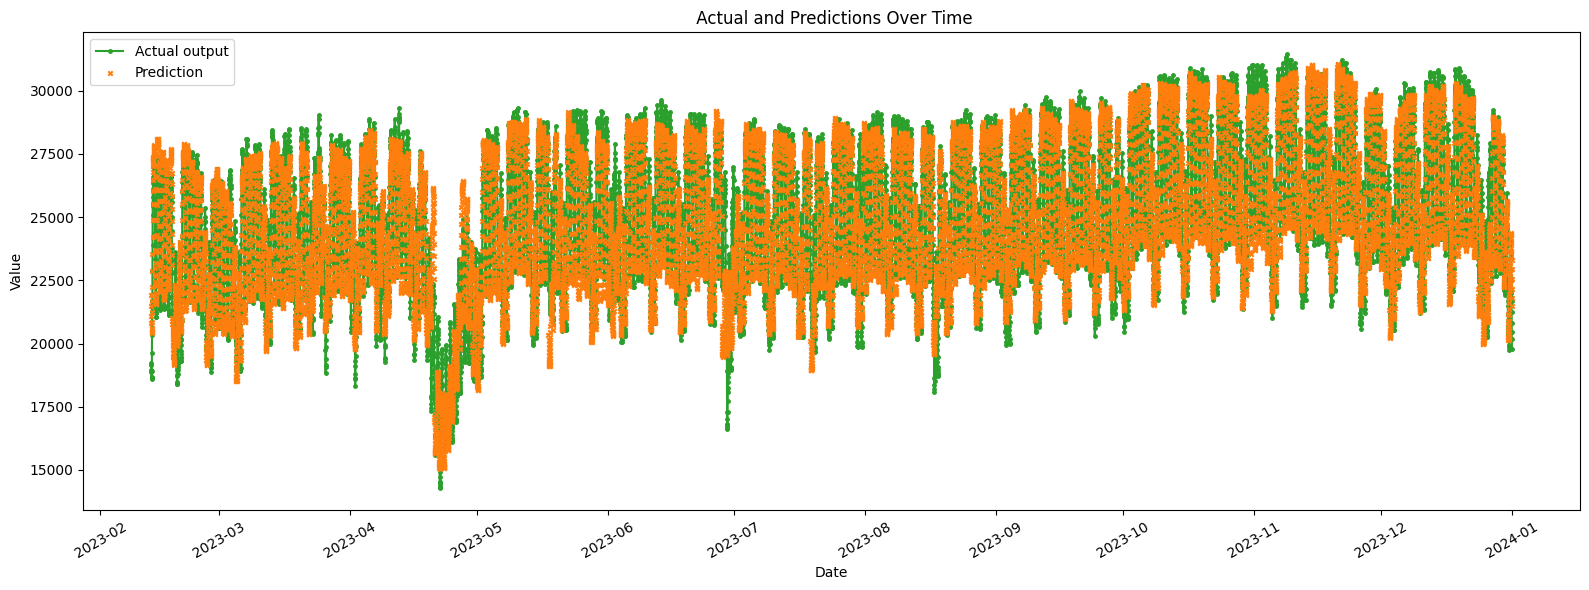

In [12]:
df= df_pred_act.copy()
plt.figure(figsize=(16, 6))

# Plot the "Actual" as a green line with dot markers
plt.plot(
    df.index, 
    df['Aktual'], 
    label='Actual output', 
    marker='.', 
    markersize=5, 
    color='#2ca02c', 
    zorder=-100
)

# Scatter plot for "Prediction" in orange X markers
plt.scatter(
    df.index, 
    df['Prediksi'], 
    marker='x', 
    #edgecolors='k', 
    label='Prediction', 
    c='#ff7f0e', 
    s=10
)


plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.xticks(rotation=30)
plt.title(' Actual and Predictions Over Time')
plt.tight_layout()
plt.show()


In [13]:
df_pred_act = compute_error(x_val, data_validation['Beban'], ['Beban'], model, input_width,label_width, beban_min, beban_max)
df_pred_act

62/62 [==============================] - 0s 1ms/step
MAE: 1139.9458164221292, MAPE %: 4.577825681630414, MSE: 2091561.6589827382, RMSE: 1446.2232396773113


,Prediksi,Aktual
Date,,
2024-01-02 00:30:00,22362.839844,20109.84
2024-01-02 01:00:00,21966.363281,19904.52
2024-01-02 01:30:00,21636.554688,19715.16
2024-01-02 02:00:00,21382.234375,19513.55
2024-01-02 02:30:00,21213.974609,19368.73
...,...,...
2024-02-11 22:00:00,22427.859375,23109.43
2024-02-11 22:30:00,22084.787109,22627.13
2024-02-11 23:00:00,21745.605469,22035.37


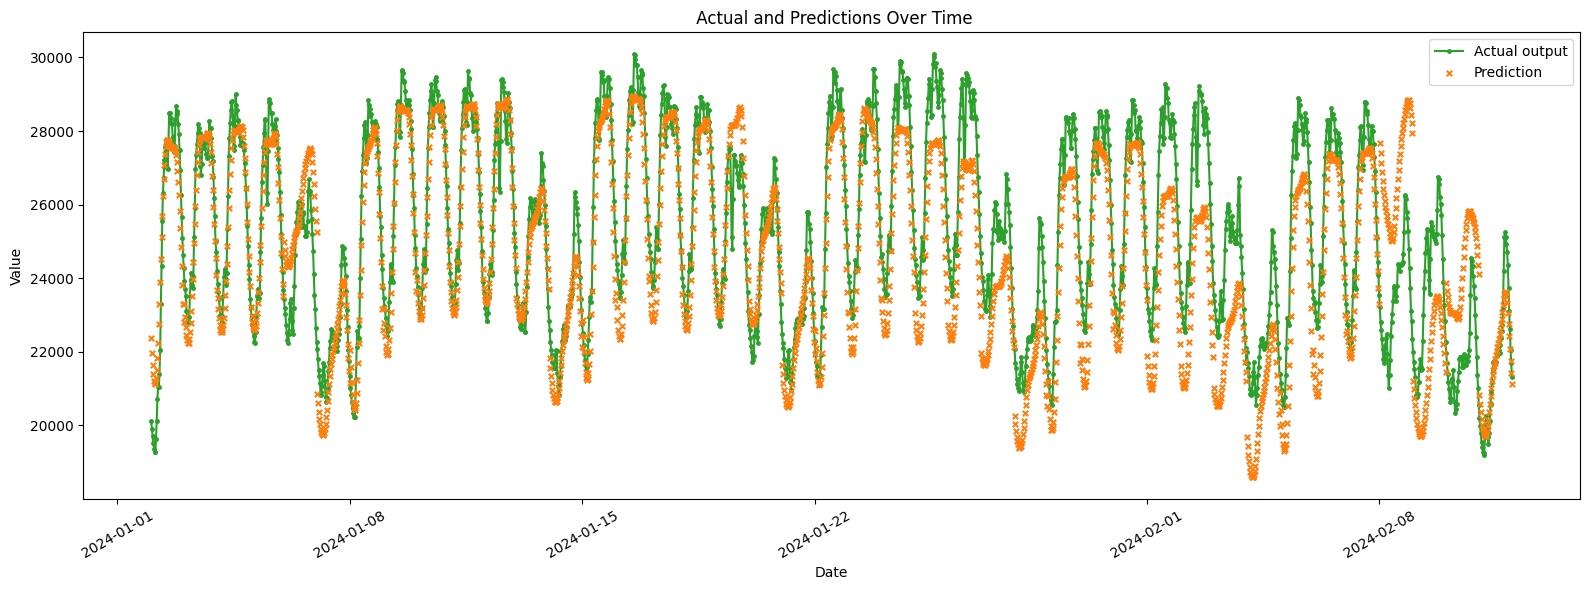

In [14]:
df= df_pred_act.copy()
plt.figure(figsize=(16, 6))

# Plot the "Actual" as a green line with dot markers
plt.plot(
    df.index, 
    df['Aktual'], 
    label='Actual output', 
    marker='.', 
    markersize=5, 
    color='#2ca02c', 
    zorder=-100
)

# Scatter plot for "Prediction" in orange X markers
plt.scatter(
    df.index, 
    df['Prediksi'], 
    marker='x', 
    #edgecolors='k', 
    label='Prediction', 
    c='#ff7f0e', 
    s=15
)


plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.xticks(rotation=30)
plt.title(' Actual and Predictions Over Time')
plt.tight_layout()
plt.show()
